# Detailed Data Cleaning/Visualization

## First Glance

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 9)

Populating the interactive namespace from numpy and matplotlib


Sample the train set, data is huge

In [2]:
limit_rows = 7000000
df = pd.read_csv('../input/train_ver2.csv', nrows=limit_rows)

C:\Users\lyaa\AppData\Local\Continuum\miniconda3\envs\kaggle\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,8,10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head().T

,0,1,2,3,4
fecha_dato,2015-01-28,2015-01-28,2015-01-28,2015-01-28,2015-01-28
ncodpers,1375586,1050611,1050612,1050613,1050614
ind_empleado,N,N,N,N,N
pais_residencia,ES,ES,ES,ES,ES
sexo,H,V,V,H,V
age,35,23,23,22,23
fecha_alta,2015-01-12,2012-08-10,2012-08-10,2012-08-10,2012-08-10
ind_nuevo,0,0,0,0,0
antiguedad,6,35,35,35,35
indrel,1,1,1,1,1


In [4]:
unique_ids = pd.Series(df['ncodpers'].unique())

In [5]:
limit_people = 12000
unique_id = unique_ids.sample(limit_people)
df = df[df.ncodpers.isin(unique_id)]
df.describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,9.287800e+04,92445.000000,92445.000000,92445.0,92088.000000,92445.000000,7.646300e+04,92878.0,92878.0,92878.000000,...,92878.000000,92878.000000,92878.000000,92878.000000,92878.000000,92878.000000,92878.000000,92618.000000,92618.000000,92878.000000
mean,8.037766e+05,0.040132,1.154773,1.0,26.564927,0.490789,1.328334e+05,0.0,0.0,0.712268,...,0.007881,0.009561,0.004091,0.053716,0.046577,0.025657,0.004867,0.053305,0.058563,0.127931
std,4.208172e+05,0.196270,3.891526,0.0,12.828550,0.499918,2.076223e+05,0.0,0.0,0.452708,...,0.088427,0.097312,0.063833,0.225457,0.210733,0.158112,0.069591,0.224642,0.234806,0.334015
min,1.606200e+04,0.000000,1.000000,1.0,1.000000,0.000000,5.437620e+03,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.177190e+05,0.000000,1.000000,1.0,15.000000,0.000000,6.911985e+04,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.254240e+05,0.000000,1.000000,1.0,28.000000,0.000000,1.018662e+05,0.0,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.162000e+06,0.000000,1.000000,1.0,35.000000,1.000000,1.551831e+05,0.0,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.495458e+06,1.000000,99.000000,1.0,52.000000,1.000000,1.326862e+07,0.0,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Convert datatime

In [6]:
df['fecha_dato'] = pd.to_datetime(df['fecha_dato'], format='%Y-%m-%d')
df['fecha_alta'] = pd.to_datetime(df['fecha_alta'], format='%Y-%m-%d')

Month of samples

In [7]:
df['month'] = pd.DatetimeIndex(df['fecha_dato']).month

In [8]:
df.age = pd.to_numeric(df.age, errors='coerce')

Missing values of each column

In [9]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                       True
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

## Data Cleaning

`age`

**Note the threshold of age groups might be improved**

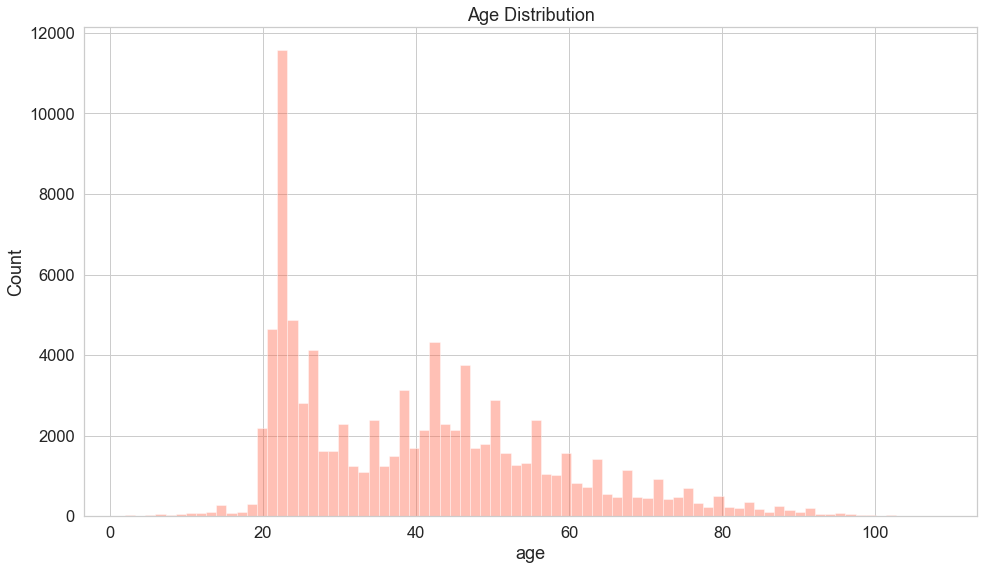

In [10]:
with sns.plotting_context("notebook",font_scale=1.5):
    plt.figure(figsize=(16, 9))
    sns.set_style("whitegrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.title("Age Distribution")
    plt.ylabel("Count")

In [13]:
df.loc[df.age<18, 'age'] = df.loc[(df.age>=18) & (df.age<30), 'age'].mean(skipna=True)
df.loc[df.age>100, 'age'] = df.loc[(df.age>=30) & (df.age<100), 'age'].mean(skipna=True)
df.age.fillna(df.age.mean(), inplace=True)
df.age = df.age.astype(np.int8)

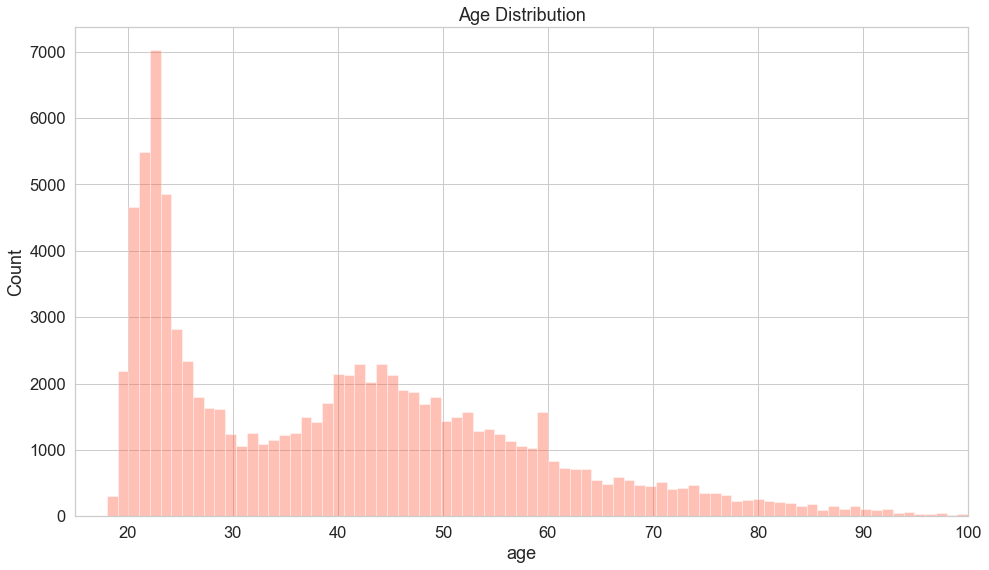

In [17]:
with sns.plotting_context("notebook",font_scale=1.5):
    plt.figure(figsize=(16, 9))
    sns.set_style("whitegrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100))

`ind_nuevo`, if a customer is new or not

**Note that `ind_nuevo` should be a function of `fecha_dato` and `fecha_alta`**

In [24]:
df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1', 'month'],
      dtype='object')

In [36]:
date_first_active = df.loc[df.ind_nuevo.isnull(), :].groupby('ncodpers', sort=False)['fecha_dato'].size()
date_first_active.max()

6

In [37]:
df.loc[df.ind_nuevo.isnull(), 'ind_nuevo'] = 1

In [38]:
df.ind_nuevo.isnull().sum()

0

`antiguedad` Customer seniority (in months)

In [42]:
df.antiguedad.unique()

array(['     35', '     34', '     33', '     NA', '     36', '     27',
       '     31', '     38', '     37', '     39', '      8', '     32',
       '     28', '     29', '     22', '     26', '     30', '     10',
       '     47', '     44', '     46', '     12', '     45', '     57',
       '     58', '     59', '     48', '     54', '     53', '     55',
       '     56', '     51', '     62', '     63', '     60', '     24',
       '     61', '     50', '     52', '     49', '     42', '     13',
       '     43', '     21', '     41', '     40', '     25', '     16',
       '      9', '     11', '     18', '     14', '     15', '      7',
       '      6', '     23', '     20', '     19', '     17', '      2',
       '    165', '    113', '    160', '    164', '    129', '    187',
       '    138', '    166', '    167', '    108', '    168', '     67',
       '    157', '     84', '    133', '    150', '    163', '    125',
       '     85', '    162', '    116', '    106', 

In [43]:
df.antiguedad = pd.to_numeric(df.antiguedad, errors='coerce')
np.sum(df.antiguedad.isnull())

433

The number of nulls in `antiguedad` is the same as `ind_nuevo`, maybe it's the same group of customers

**Note the method below is not strict**

In [45]:
df.loc[df.antiguedad.isnull(), 'ind_nuevo'].describe()

count    433.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: ind_nuevo, dtype: float64

In [49]:
df.loc[df.antiguedad.isnull(), 'antiguedad'] = df.antiguedad.min()
df.loc[df.antiguedad<0, 'antiguedad'] = 0

In [51]:
df.antiguedad.isnull().sum()

0

`fecha_alta` The date in which the customer became as the first holder of a contract in the bank.

Note this is the same group of customers

In [53]:
df.fecha_alta.isnull().sum()

433

In [54]:
dates = df.loc[:, 'fecha_alta'].sort_values().reset_index()

In [56]:
median_date = int(np.median(dates.index.values))

In [58]:
df.loc[df.fecha_alta.isnull(), 'fecha_alta'] = dates.loc[median_date, 'fecha_alta']

In [59]:
df.fecha_alta.describe()

count                   92878
unique                   3912
top       2011-08-11 00:00:00
freq                      478
first     1995-02-21 00:00:00
last      2015-10-30 00:00:00
Name: fecha_alta, dtype: object

`indrel` 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)

In [62]:
df.indrel.isnull().sum()

433

In [66]:
df.loc[df.indrel.isnull(), 'indrel'] = 1

In [70]:
df.indrel = df.indrel.astype(np.int8)

`tipodom` Addres type. 1, primary address cod_prov - Province code (customer's address)

In [73]:
df.tipodom.isnull().sum()

433

In [74]:
df.drop(['tipodom'], axis=1, inplace=True)

`cod_prov` Province code (customer's address)

In [75]:
df.cod_prov.unique()

array([41., 46.,  8., 17., 28., 20., 37., 15., 45., 49.,  3., 39., 16.,
        6., 36., 11., 43., 32., 12., 34., 26., 29., 47., 18., 13., 14.,
       10., 33., 35., 42., 44., 50., 30.,  2., 24., 31., 22.,  7.,  9.,
       21., 25.,  1., nan,  5., 27.,  4., 23., 48., 38., 40., 51., 19.,
       52.])

In [76]:
df.cod_prov.isnull().sum()

790

In [77]:
df.drop(['cod_prov'], axis=1, inplace=True)

Check missing values

In [78]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme

`ind_activadad_cliente` Activity index (1, active customer; 0, inactive customer)

In [81]:
df.ind_actividad_cliente.unique()

array([ 1.,  0., nan])

In [82]:
df.ind_actividad_cliente.isnull().sum()

433

In [83]:
df.loc[df.ind_actividad_cliente.isnull(), 'ind_actividad_cliente'] = df.ind_actividad_cliente.median()

In [85]:
df.ind_actividad_cliente.value_counts()

0.0    47507
1.0    45371
Name: ind_actividad_cliente, dtype: int64

`nomprov` Province name

In [86]:
df.nomprov.unique()

array(['SEVILLA', 'VALENCIA', 'BARCELONA', 'GIRONA', 'MADRID', 'GIPUZKOA',
       'SALAMANCA', 'CORUÑA, A', 'TOLEDO', 'ZAMORA', 'ALICANTE',
       'CANTABRIA', 'CUENCA', 'BADAJOZ', 'PONTEVEDRA', 'CADIZ',
       'TARRAGONA', 'OURENSE', 'CASTELLON', 'PALENCIA', 'RIOJA, LA',
       'MALAGA', 'VALLADOLID', 'GRANADA', 'CIUDAD REAL', 'CORDOBA',
       'CACERES', 'ASTURIAS', 'PALMAS, LAS', 'SORIA', 'TERUEL',
       'ZARAGOZA', 'MURCIA', 'ALBACETE', 'LEON', 'NAVARRA', 'HUESCA',
       'BALEARS, ILLES', 'BURGOS', 'HUELVA', 'LERIDA', 'ALAVA', nan,
       'AVILA', 'LUGO', 'ALMERIA', 'JAEN', 'BIZKAIA',
       'SANTA CRUZ DE TENERIFE', 'SEGOVIA', 'CEUTA', 'GUADALAJARA',
       'MELILLA'], dtype=object)

There was an issue with the unicode character ñ in A Coruña. I'll manually fix it, but if anybody knows a better way to catch cases like this I would be very glad to hear it in the comments.

In [87]:
df.loc[df.nomprov=="CORU\xc3\x91A, A","nomprov"] = "CORUNA, A"